In [18]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
game_data = pd.read_csv('data/master_games.csv')

games = game_data[['away_conference','away_id','away_points','away_team','conference_game','home_conference','home_id','home_points','home_team','neutral_site','season','season_type','week']]

games['home_conference'] = games['home_conference'].fillna('FCS')
games['away_conference'] = games['away_conference'].fillna('FCS')

games['did_home_win'] = games['home_points'] > games['away_points']

games['fbs_matchup'] = games.apply(lambda game : ((game['away_conference'] != 'FCS') and (game['home_conference'] != 'FCS')), axis=1)

games['total_points'] = games['away_points'] + games['home_points']

In [3]:
games

,away_conference,away_id,away_points,away_team,conference_game,home_conference,home_id,home_points,home_team,neutral_site,season,season_type,week,did_home_win,fbs_matchup,total_points
0,FCS,93,9,Murray State,False,Big East,97,21,Louisville,False,2011,regular,1,True,False,30
1,Sun Belt,249,16,North Texas,True,Sun Belt,2229,41,Florida International,False,2011,regular,1,True,True,57
2,FCS,160,22,New Hampshire,False,Mid-American,2649,58,Toledo,False,2011,regular,1,True,False,80
3,FCS,2569,6,South Carolina State,False,Mid-American,2117,21,Central Michigan,False,2011,regular,1,True,False,27
4,FCS,222,7,Villanova,False,Mid-American,218,42,Temple,False,2011,regular,1,True,False,49
5,FCS,2428,0,North Carolina Central,False,Big East,164,48,Rutgers,False,2011,regular,1,True,False,48
6,FCS,2717,21,Western Carolina,False,ACC,59,63,Georgia Tech,False,2011,regular,1,True,False,84
7,SEC,344,59,Mississippi State,False,Conference USA,235,14,Memphis,False,2011,regular,1,False,True,73
8,Mountain West,2439,17,UNLV,False,Big Ten,275,51,Wisconsin,False,2011,regular,1,True,True,68
9,ACC,154,29,Wake Forest,False,Big East,183,36,Syracuse,False,2011,regular,1,True,True,65


In [4]:
games.groupby('fbs_matchup').mean()

,away_id,away_points,conference_game,home_id,home_points,neutral_site,season,week,did_home_win,total_points
fbs_matchup,,,,,,,,,,
False,1718.998972,14.818088,0.000000,919.894142,43.621788,0.005139,2015.046249,2.978417,0.917780,58.439877
True,883.057871,26.042409,0.674717,820.998969,30.444412,0.077161,2015.063908,7.286997,0.579296,56.486821


In [5]:
count_no_fbs = len(games[games['fbs_matchup'] == False])
count_fbs = len(games[games['fbs_matchup'] == True])

pct_no_fbs = (count_no_fbs/(count_no_fbs + count_fbs))*100
pct_fbs = (100 - pct_no_fbs)

print('No FBS: {}\nFBS: {}'.format(pct_no_fbs, pct_fbs))

No FBS: 12.53219989696033
FBS: 87.46780010303966


In [6]:
count_no_hw = len(games[games['did_home_win'] == False])
count_hw = len(games[games['did_home_win'] == True])

pct_no_hw = (count_no_hw/(count_no_hw + count_hw))*100
pct_hw = (100 - pct_no_hw)

print('No Home Win: {}\nHome Win: {}'.format(pct_no_hw, pct_hw))

No Home Win: 37.82843894899536
Home Win: 62.17156105100464


In [7]:
games.groupby('did_home_win').mean()

,away_id,away_points,conference_game,home_id,home_points,neutral_site,season,week,fbs_matchup,total_points
did_home_win,,,,,,,,,,
False,846.938032,35.693224,0.703439,876.899898,20.540688,0.083418,2015.041879,7.276813,0.972761,56.233912
True,1073.539466,17.907810,0.521235,806.920655,39.126580,0.058836,2015.073752,6.424694,0.814999,57.034390


In [8]:
games.groupby('week').mean()

,away_id,away_points,conference_game,home_id,home_points,neutral_site,season,did_home_win,fbs_matchup,total_points
week,,,,,,,,,,
1,1126.469835,21.728519,0.026508,805.512797,35.025594,0.364717,2015.130713,0.708410,0.659963,56.754113
2,1226.362121,19.810606,0.100000,807.092424,36.027273,0.007576,2015.071212,0.743939,0.625758,55.837879
3,1126.443686,22.803754,0.148464,821.155290,34.733788,0.018771,2015.046075,0.679181,0.761092,57.537543
4,1068.015009,24.566604,0.358349,786.328330,33.168856,0.009381,2015.000000,0.624765,0.844278,57.735460
5,947.764471,25.666667,0.684631,800.908184,30.994012,0.019960,2015.059880,0.578842,0.958084,56.660679
6,838.365854,26.945122,0.853659,918.453252,30.097561,0.010163,2014.975610,0.579268,0.991870,57.042683
7,891.024590,25.752049,0.887295,844.520492,28.618852,0.014344,2015.057377,0.549180,0.979508,54.370902
8,876.280242,25.735887,0.901210,883.038306,30.872984,0.002016,2015.110887,0.606855,0.977823,56.608871
9,919.513238,27.173116,0.910387,860.042770,30.892057,0.016293,2015.006110,0.568228,0.981670,58.065173


In [9]:
games[games['home_conference'] != 'FCS'].groupby('home_conference').mean()

,away_id,away_points,conference_game,home_id,home_points,neutral_site,season,week,did_home_win,fbs_matchup,total_points
home_conference,,,,,,,,,,,
ACC,667.130435,23.367277,0.568650,314.693364,31.856979,0.078947,2015.086957,6.511442,0.630435,0.853547,55.224256
American Athletic,1090.138889,26.351852,0.609259,1025.996296,32.164815,0.048148,2016.092593,6.914815,0.607407,0.870370,58.516667
Big 12,1176.589623,26.671384,0.641509,1075.488994,35.860063,0.100629,2014.982704,6.632075,0.624214,0.888365,62.531447
Big East,731.768519,20.444444,0.518519,404.185185,29.185185,0.037037,2011.481481,6.620370,0.629630,0.842593,49.629630
Big Ten,781.826727,22.394111,0.585504,508.639864,30.718007,0.062288,2015.140430,6.408834,0.642129,0.927520,53.112118
Conference USA,1395.233244,26.135389,0.650134,1413.470509,30.872654,0.045576,2015.143432,6.954424,0.584450,0.883378,57.008043
FBS Independents,907.219697,23.962121,0.000000,519.852273,31.852273,0.094697,2015.204545,6.806818,0.655303,0.856061,55.814394
Mid-American,1510.065217,25.859420,0.666667,1691.201449,30.031884,0.055072,2014.926087,6.966667,0.555072,0.852174,55.891304
Mountain West,983.508296,26.429864,0.621418,921.159879,31.725490,0.048265,2015.206637,6.957768,0.595777,0.856712,58.155354


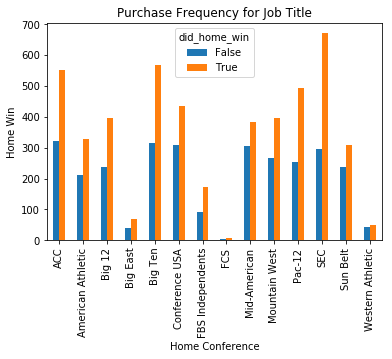

In [10]:
pd.crosstab(games.home_conference,games.did_home_win).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Home Conference')
plt.ylabel('Home Win')
plt.savefig('home_conf_win')

In [11]:
away_confs, away_conf_uniques = pd.factorize(games['away_conference'])
games['away_conference'] = away_confs
home_confs, home_conf_uniques = pd.factorize(games['home_conference'])
games['home_conference'] = home_confs

away_team, away_team_uniques = pd.factorize(games['away_team'])
games['away_team'] = away_team
home_team, home_team_uniques = pd.factorize(games['home_team'])
games['home_team'] = home_team

season_type, season_type_uniques = pd.factorize(games['season_type'])
games['season_type'] = season_type

games.head()

,away_conference,away_id,away_points,away_team,conference_game,home_conference,home_id,home_points,home_team,neutral_site,season,season_type,week,did_home_win,fbs_matchup,total_points
0,0,93,9,0,False,0,97,21,0,False,2011,0,1,True,False,30
1,1,249,16,1,True,1,2229,41,1,False,2011,0,1,True,True,57
2,0,160,22,2,False,2,2649,58,2,False,2011,0,1,True,False,80
3,0,2569,6,3,False,2,2117,21,3,False,2011,0,1,True,False,27
4,0,222,7,4,False,2,218,42,4,False,2011,0,1,True,False,49


In [12]:
cat_vars=['away_conference','away_id','away_points','away_team','conference_game','home_conference','home_id','home_points','home_team','neutral_site']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(games[var], prefix=var)
    games_temp=games.join(cat_list)
    games=games_temp

cat_vars=['away_conference','away_id','away_points','away_team','conference_game','home_conference','home_id','home_points','home_team','neutral_site']

games_vars=games.columns.values.tolist()
to_keep=[i for i in games_vars if i not in cat_vars]

games_final=games[to_keep]
games_final.columns.values

games_final.head()

,season,season_type,week,did_home_win,fbs_matchup,total_points,away_conference_0,away_conference_1,away_conference_2,away_conference_3,...,home_team_126,home_team_127,home_team_128,home_team_129,home_team_130,home_team_131,home_team_132,home_team_133,neutral_site_False,neutral_site_True
0,2011,0,1,True,False,30,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2011,0,1,True,True,57,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2011,0,1,True,False,80,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2011,0,1,True,False,27,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2011,0,1,True,False,49,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
X_set = games_final.loc[:, games_final.columns != 'did_home_win']
y_set = games_final.loc[:, games_final.columns == 'did_home_win']

In [19]:
games_final_vars = games_final.columns.values.tolist()

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

       False       0.84      0.83      0.84       854
        True       0.90      0.91      0.91      1476

    accuracy                           0.88      2330
   macro avg       0.87      0.87      0.87      2330
weighted avg       0.88      0.88      0.88      2330



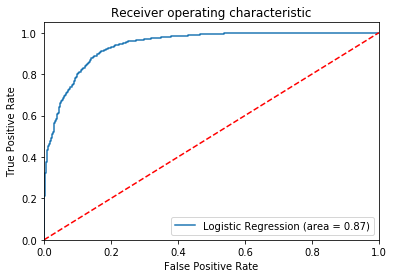

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()